# Importando as bibliotecas

In [1]:
import pandas as pd
!pip install openpyxl==3.0.9
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import scipy.stats as stats
import statistics
import itertools
!pip install unidecode
import unidecode as uni

     |████████████████████████████████| 235 kB 5.1 MB/s 


# Arquivo

## Carregando os dados do arquivo

In [2]:
df = pd.read_csv("/content/drive/MyDrive/nyflights.csv")

##Descrição dos dados do arquivo

### Colunas:

year - Ano do vôo

month - Mês do vôo

day - Dia (número do vôo)

dep_time - Momento de decolagem

sched_dep_time - Momento previsto de decolagem

dep_delay - Atraso na decolagem (em minutos)

arr_time - Momento de chegada

sched_arr_time - Momento previsto de chegada

arr_delay - Atraso na chegada (em minutos)

carrier- Detalhes da transportadora do vôo

flight - Nome do vôo

tailnum - Número de registro da aeronave

origin - Origem do vôo

dest - Nome do aeroporto de destino

air_time - Tempo de vôo (Tempo no ar - tempo de viagem (em minutos)) 

distance - Distância (em milhas?)

hour - Hora

minute - Minuto

time_hour - Data - Hora


# EDA

## Visão inicial dos dados

In [10]:
df.shape

(336776, 20)

In [4]:
df.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [8]:
df.dtypes

Unnamed: 0          int64
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

In [6]:
df.describe()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168388.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,1.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84194.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168388.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252582.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336776.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [45]:
# Informações da quantidade percentual de valores nulos por coluna

colunas = df.isnull().sum().keys().values
valores = df.isnull().sum().values

for a, b in zip(colunas, valores):
  print(f'{a:<15}: {b:>4} -> {b * 100/df.shape[0]:>3.2f}% do total')

Unnamed: 0     :    0 -> 0.00% do total
year           :    0 -> 0.00% do total
month          :    0 -> 0.00% do total
day            :    0 -> 0.00% do total
dep_time       : 8255 -> 2.45% do total
sched_dep_time :    0 -> 0.00% do total
dep_delay      : 8255 -> 2.45% do total
arr_time       : 8713 -> 2.59% do total
sched_arr_time :    0 -> 0.00% do total
arr_delay      : 9430 -> 2.80% do total
carrier        :    0 -> 0.00% do total
flight         :    0 -> 0.00% do total
tailnum        : 2512 -> 0.75% do total
origin         :    0 -> 0.00% do total
dest           :    0 -> 0.00% do total
air_time       : 9430 -> 2.80% do total
distance       :    0 -> 0.00% do total
hour           :    0 -> 0.00% do total
minute         :    0 -> 0.00% do total
time_hour      :    0 -> 0.00% do total


# Etapa 1

## Qual o comportamento médio e a variância dos dados dos voos que atrasam mais de duas horas? 

### a. Filtrar a tabela com os registrados que atrasam mais de duas horas.

In [47]:
df_atraso = df[df['dep_delay'] > 120]

###b. Filtrar a coluna 'dep_delay'  e aplicar as funções describe() e .T 



In [66]:
df_atraso_desc = pd.DataFrame(df_atraso['dep_delay'].describe())
df_atraso_desc_transposto = df_atraso_desc.transpose()

####i. Com o describe() algumas medidas de tendência central, mas não temos a variância.

###c. Adicionar uma coluna para a amplitude: df['range'] = df['max'] - df['min']


In [67]:
df_atraso_desc_transposto['range'] = df_atraso_desc_transposto['max'] - df_atraso_desc_transposto['min']

###d. Adicionar uma coluna para variância: dfT['var'] = pow(dfT_1['std'], 2)


In [70]:
df_atraso_desc_transposto['var'] = pow(df_atraso_desc_transposto['std'], 2)

###e. PLUS:  Plotar um histograma e um boxplot com os dados da coluna 'dep_delay'


#### Histograma

[Text(0, 0.5, 'Frequência'),
 Text(0.5, 0, 'Atraso do vôo (minutos)'),
 Text(0.5, 1.0, 'Histograma dos vôos atrasados')]

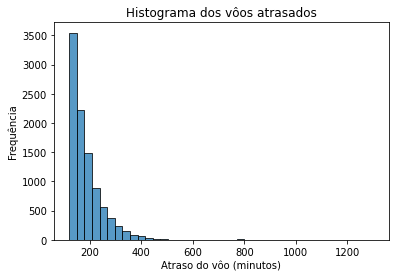

In [88]:
axh = sns.histplot(data=df_atraso, x="dep_delay", bins = 40)
axh.set(xlabel='Atraso do vôo (minutos)', ylabel='Frequência', title='Histograma dos vôos atrasados')
#sns.set(ax={"figure.figsize":(20, 15)}) #width=3, #height=4

#### Boxplot

[Text(0.5, 0, 'Atraso do vôo (minutos)'),
 Text(0.5, 1.0, 'Boxplot dos vôos atrasados')]

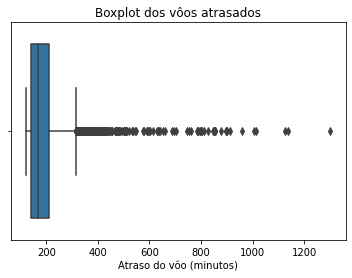

In [87]:
axb = sns.boxplot(data=df_atraso, x="dep_delay")
axb.set(xlabel='Atraso do vôo (minutos)', title='Boxplot dos vôos atrasados')

####i. PLUS: O que podemos concluir a partir dessa análise gráfica?

##### 1) Do histograma - A distribuição dos atrasos do vôo não é uma distribuição normal, tendo um pico de concentração no valor inicial analisado (120 minutos).negrito. Isso significa que a probabilidade do vôo atrasar reduz à medida que o tempo de atraso aumenta;

##### 2) Do boxplot - As maiores probabilidades de atraso de vôos encontram-se na faixa até um pouco acima de 200 minutos, sendo vôos com atraso superior a, aproximadamente, 310 minutos, considerados anomalias (outliers). 

# Etapa 2

## Quais destinos geraram vôos com maior número de atrasos na partida? (5 minutos de atraso é aceitável)

### a. Filtrar a tabela com os registrados que atrasam mais do que 5 minutos

In [89]:
df_atraso2 = df[df['dep_delay'] > 5]

###b. Filtrar a coluna de destino, fazer uma contagem dos valores e apresentar os 5 últimos



In [91]:
df_atraso2['dest'].value_counts().tail()

MTJ    6
SBN    6
EYW    6
PSP    3
ANC    3
Name: dest, dtype: int64

###c. Filtrar a coluna de destino, fazer uma contagem dos valores e apresentar os 5 primeiros

In [92]:
df_atraso2['dest'].value_counts().head()

ORD    4975
ATL    4687
LAX    4442
MCO    4083
SFO    4078
Name: dest, dtype: int64

###d. PLUS: Plotar o gráfico dos valores agrupados por diferentes aeroportos  vs quantidade de atrasos


In [100]:
grafico = pd.DataFrame(df_atraso2['dest'].value_counts().reset_index())
grafico.columns = ['aeroporto', 'quantidade de atrasos']

In [107]:
fig = px.histogram(grafico, x="aeroporto", y = 'quantidade de atrasos')
fig.show()

# Etapa 3

## Quais são as velocidades médias dos voos nos 5 destinos que mais ocorrem atrasos?

### a. Filtrar a tabela com os registrados que mais atrasam

In [114]:
df_atraso2 = df[df['dep_delay'] > 5]

# Lista dos destinos com maior quantidade de vôos atrasados

piores = list(df_atraso2['dest'].value_counts().head().keys().values)

# tabela apenas com os registros dos destinos com maior quantidade de vôos atrasados

df_atraso_piores = df_atraso2[df_atraso2['dest'].isin(piores)]

###b. Calcular a velocidade média



##### i. Criar uma coluna com os valores dessas velocidades médias usando as colunas de  ['distance'] e ['air_time']

In [129]:
# Criando coluna de velocidade média na tabela original

df_atraso_piores = df_atraso_piores.reset_index()
df_atraso_piores['mean_veloc'] = df_atraso_piores['distance'] / df_atraso_piores['air_time'] 

##### ii. Agrupar a tabela com os piores destinos

In [134]:
df_mais_atrasados = df_atraso_piores.groupby("dest").agg({
    "mean_veloc":"mean",
})

#### iii. PLUS: Plotar o boxplot para os quatro piores destinos

[Text(0, 0.5, 'Aeroporto'),
 Text(0.5, 0, 'Velocidade média (miles/min)'),
 Text(0.5, 1.0, 'Boxplot dos 4 aeroportos com mais vôos atrasados')]

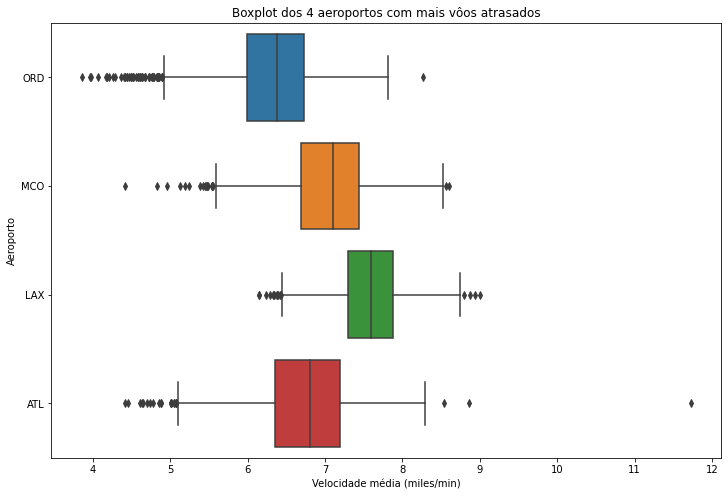

In [155]:
piores_4 = list(df_atraso2['dest'].value_counts().head().keys().values)[:4]

df_atraso_piores4 = df_atraso2[df_atraso2['dest'].isin(piores_4)]

plt.figure(figsize = (12,8))
axbox = sns.boxplot(data=df_atraso_piores4, x="mean_veloc", y = 'dest')
axbox.set(xlabel='Velocidade média (miles/min)', ylabel = 'Aeroporto', title='Boxplot dos 4 aeroportos com mais vôos atrasados')